Load neccesary libraries and functions:

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

Load the dataset:

In [73]:
data = pd.read_csv("data.csv")

I know for a fact that the name column is not going to provide any valuable information to our model so we can get rid of that:

In [74]:
data = data.drop(['name'],axis=1).copy()

Now I need to normalize the data accross columns, this is important for  KNeighborsClassifier

In [75]:
data = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data.values.astype(float)))

Now it is time to use the hold out method to split my data between training and testing set.

In [76]:
training, testing = train_test_split(data, test_size=0.2, shuffle=True).copy()

Now I need to figure out what value should I use for the k in my K_neighbours classifier. I will do this using GridSearchCV. GridSearchCV does the cross validation for me, this is pretty cool. I choose 7 fold for my cross validation because I gave it 7 possibilities for k. When I run the following script, it told me that 5 is the best option for k.

In [77]:
x_training = training.iloc[:, 0:-1].values
y_training = training.iloc[:, 22].values
parameters = {'n_neighbors':[4, 5, 6, 7, 8, 9, 10]}
K_neighbours = KNeighborsClassifier()
classifier = GridSearchCV(K_neighbours, parameters, cv=7)
classifier.fit(x_training, y_training)
classifier.best_params_

{'n_neighbors': 6}

Now that we have determined a value for k, we can actually train our model using the entire training data set. We can also test it. When I run this I botained a 92% accuaracy.

In [78]:
x_testing = testing.iloc[:, 0:-1].values
y_testing = testing.iloc[:, 22].values
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_training, y_training) 
accuaracy = 1 - np.mean( model.predict(x_testing) != y_testing )
print(accuaracy)

0.8974358974358975


Now it is time to plot our validation curve. I found out how to do this on the sklearn website: http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

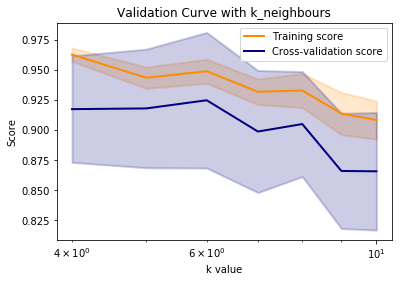

In [79]:
train_scores, test_scores = validation_curve(K_neighbours, x_training, y_training, param_name='n_neighbors', param_range=[4, 5, 6, 7, 8, 9, 10], cv=7, scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with k_neighbours")
plt.xlabel("k value")
plt.ylabel("Score")
lw = 2
plt.semilogx([4, 5, 6, 7, 8, 9, 10], train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between([4, 5, 6, 7, 8, 9, 10], train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx([4, 5, 6, 7, 8, 9, 10], test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between([4, 5, 6, 7, 8, 9, 10], test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Now I am going to plot my learning curve. I got a lot of this code from sklearn's website: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

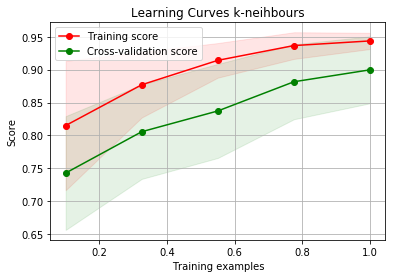

In [80]:
title = "Learning Curves k-neihbours"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(K_neighbours, x_training, y_training, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(np.linspace(.1, 1.0, 5), train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(np.linspace(.1, 1.0, 5), test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(np.linspace(.1, 1.0, 5), train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(np.linspace(.1, 1.0, 5), test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()